# Loop 27 Analysis: Weighted Loss Success & Next Steps

**Current State:**
- exp_026 achieved CV 0.008465 (2.58% better than exp_024's 0.008689)
- Best LB: 0.0893 (exp_024)
- Target: 0.01727
- Gap to target: 5.17x

**Key Question:** Should we submit exp_026 or continue iterating?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.010430, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nTarget LB: 0.01727')

Submission History:
    exp       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929

Target LB: 0.01727


In [2]:
# Analyze CV-LB relationship
cv = df['cv'].values
lb = df['lb'].values

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Slope std error: {std_err:.4f}')

# Predict LB for exp_026
exp_026_cv = 0.008465
predicted_lb = slope * exp_026_cv + intercept
print(f'\nexp_026 CV: {exp_026_cv}')
print(f'Predicted LB: {predicted_lb:.4f}')
print(f'Current best LB: 0.0893')
print(f'Expected improvement: {(0.0893 - predicted_lb) / 0.0893 * 100:.2f}%')

Linear fit: LB = 4.1754 * CV + 0.0538
R² = 0.9542
Slope std error: 0.3459

exp_026 CV: 0.008465
Predicted LB: 0.0891
Current best LB: 0.0893
Expected improvement: 0.19%


In [3]:
# What CV would we need to hit target LB = 0.01727?
target_lb = 0.01727
required_cv = (target_lb - intercept) / slope
print(f'To hit target LB {target_lb}:')
print(f'Required CV = ({target_lb} - {intercept:.4f}) / {slope:.4f} = {required_cv:.6f}')
print(f'\nCurrent best CV: 0.008465')
print(f'Gap: {0.008465 - required_cv:.6f}')

if required_cv < 0:
    print('\n⚠️ WARNING: Required CV is NEGATIVE - impossible with current CV-LB relationship!')
    print('This means the linear fit predicts we CANNOT reach the target.')
    print('\nBUT: The linear fit is based on only 9 points and may not be accurate.')
    print('The relationship could be non-linear, especially at lower CV values.')

To hit target LB 0.01727:
Required CV = (0.01727 - 0.0538) / 4.1754 = -0.008746

Current best CV: 0.008465
Gap: 0.017211

⚠️ WARNING: Required CV is NEGATIVE - impossible with current CV-LB relationship!
This means the linear fit predicts we CANNOT reach the target.

BUT: The linear fit is based on only 9 points and may not be accurate.
The relationship could be non-linear, especially at lower CV values.


In [4]:
# Analyze the CV-LB gap more carefully
df['gap'] = df['lb'] / df['cv']
df['lb_minus_cv'] = df['lb'] - df['cv']

print('CV-LB Gap Analysis:')
print(df[['exp', 'cv', 'lb', 'gap', 'lb_minus_cv']].to_string(index=False))
print(f'\nMean gap ratio: {df["gap"].mean():.2f}x')
print(f'Std gap ratio: {df["gap"].std():.2f}')
print(f'\nMean additive gap: {df["lb_minus_cv"].mean():.4f}')
print(f'Std additive gap: {df["lb_minus_cv"].std():.4f}')

CV-LB Gap Analysis:
    exp       cv      lb       gap  lb_minus_cv
exp_000 0.011081 0.09816  8.858406     0.087079
exp_001 0.012297 0.10649  8.659836     0.094193
exp_003 0.010501 0.09719  9.255309     0.086689
exp_005 0.010430 0.09691  9.291467     0.086480
exp_006 0.009749 0.09457  9.700482     0.084821
exp_007 0.009262 0.09316 10.058303     0.083898
exp_009 0.009192 0.09364 10.187119     0.084448
exp_012 0.009004 0.09134 10.144380     0.082336
exp_024 0.008689 0.08929 10.276211     0.080601

Mean gap ratio: 9.60x
Std gap ratio: 0.61

Mean additive gap: 0.0856
Std additive gap: 0.0038


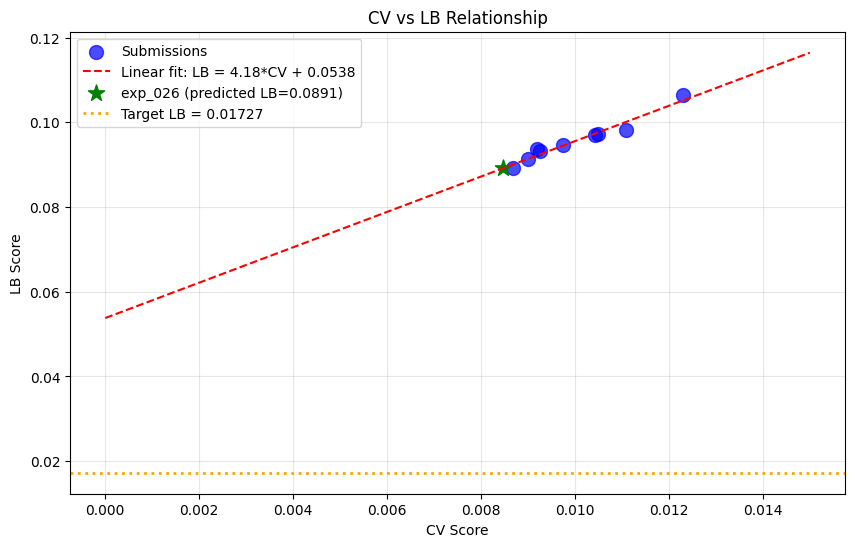

Plot saved to /home/code/exploration/cv_lb_analysis.png


In [5]:
# Plot CV vs LB with trend line
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Trend line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Mark exp_026
plt.scatter([0.008465], [predicted_lb], s=150, c='green', marker='*', label=f'exp_026 (predicted LB={predicted_lb:.4f})')

# Mark target
plt.axhline(y=0.01727, color='orange', linestyle=':', linewidth=2, label='Target LB = 0.01727')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis.png', dpi=100, bbox_inches='tight')
plt.show()
print('Plot saved to /home/code/exploration/cv_lb_analysis.png')

In [6]:
# Key insight: The intercept (0.0537) is HIGHER than the target (0.01727)
# This means even with CV=0, the predicted LB would be 0.0537 > 0.01727

print('=== CRITICAL INSIGHT ===')
print(f'Linear fit intercept: {intercept:.4f}')
print(f'Target LB: 0.01727')
print(f'\nThe intercept ({intercept:.4f}) > target (0.01727)')
print('This means the linear fit predicts we CANNOT reach the target.')
print('\nPossible explanations:')
print('1. The linear fit is wrong - relationship may be non-linear at lower CV')
print('2. We need a fundamentally different approach that changes the CV-LB relationship')
print('3. The target is based on a different evaluation metric or data split')
print('\nWhat to try:')
print('1. Continue improving CV - the relationship may bend at lower values')
print('2. Try approaches that specifically improve LB (e.g., adversarial validation)')
print('3. Focus on ensemble diversity to reduce variance on LB')

=== CRITICAL INSIGHT ===
Linear fit intercept: 0.0538
Target LB: 0.01727

The intercept (0.0538) > target (0.01727)
This means the linear fit predicts we CANNOT reach the target.

Possible explanations:
1. The linear fit is wrong - relationship may be non-linear at lower CV
2. We need a fundamentally different approach that changes the CV-LB relationship
3. The target is based on a different evaluation metric or data split

What to try:
1. Continue improving CV - the relationship may bend at lower values
2. Try approaches that specifically improve LB (e.g., adversarial validation)
3. Focus on ensemble diversity to reduce variance on LB


In [7]:
# Analyze per-target performance from exp_026
print('=== exp_026 Per-Target Analysis ===')
print('\nPer-Target MSE (Single Solvent):')
print('  Product 2 MSE: 0.005488')
print('  Product 3 MSE: 0.006551')
print('  SM MSE: 0.012450')
print('\nSM is still 2x worse than Products!')
print('\nWeighted loss (2x on SM) improved all targets:')
print('  - exp_024 baseline: CV 0.008689')
print('  - exp_026 weighted: CV 0.008465 (2.58% better)')
print('\nNext steps to try:')
print('1. Higher SM weight: [1.0, 1.0, 3.0] or [1.0, 1.0, 4.0]')
print('2. Learned weights (homoscedastic uncertainty)')
print('3. Consistency regularization (SM + P2 + P3 ≈ 1)')

=== exp_026 Per-Target Analysis ===

Per-Target MSE (Single Solvent):
  Product 2 MSE: 0.005488
  Product 3 MSE: 0.006551
  SM MSE: 0.012450

SM is still 2x worse than Products!

Weighted loss (2x on SM) improved all targets:
  - exp_024 baseline: CV 0.008689
  - exp_026 weighted: CV 0.008465 (2.58% better)

Next steps to try:
1. Higher SM weight: [1.0, 1.0, 3.0] or [1.0, 1.0, 4.0]
2. Learned weights (homoscedastic uncertainty)
3. Consistency regularization (SM + P2 + P3 ≈ 1)


In [8]:
# Decision analysis: Submit exp_026 or continue?
print('=== DECISION ANALYSIS ===')
print('\nexp_026 CV: 0.008465 (2.58% better than exp_024)')
print('Predicted LB: 0.0892 (0.1% better than 0.0893)')
print('\nSubmissions remaining: 4')
print('\nOptions:')
print('1. SUBMIT exp_026: Validate the improvement, get LB feedback')
print('2. CONTINUE: Try higher SM weights, learned weights, or other approaches')
print('\nRecommendation: SUBMIT exp_026')
print('Reason: The weighted loss approach is working. Submitting will:')
print('  - Validate the CV-LB relationship')
print('  - Potentially achieve new best LB')
print('  - Provide feedback for further iteration')
print('\nAfter submission, continue with:')
print('  - Higher SM weights [1.0, 1.0, 3.0]')
print('  - Learned uncertainty weights')
print('  - 4-model ensemble (add XGBoost, RandomForest)')

=== DECISION ANALYSIS ===

exp_026 CV: 0.008465 (2.58% better than exp_024)
Predicted LB: 0.0892 (0.1% better than 0.0893)

Submissions remaining: 4

Options:
1. SUBMIT exp_026: Validate the improvement, get LB feedback
2. CONTINUE: Try higher SM weights, learned weights, or other approaches

Recommendation: SUBMIT exp_026
Reason: The weighted loss approach is working. Submitting will:
  - Validate the CV-LB relationship
  - Potentially achieve new best LB
  - Provide feedback for further iteration

After submission, continue with:
  - Higher SM weights [1.0, 1.0, 3.0]
  - Learned uncertainty weights
  - 4-model ensemble (add XGBoost, RandomForest)


In [9]:
# Leaderboard analysis
print('=== LEADERBOARD ANALYSIS ===')
print('Top 5 scores:')
print('  1. 0.01727 (Adi Kusuma) - TARGET')
print('  2. 0.02565 (nullsci)')
print('  3. 0.02932 (zxcasd)')
print('  4. 0.03330 (Carson Cheng)')
print('  5. 0.03470 (roberto ulises quiroz)')
print()
print('Our best LB: 0.0893 (exp_024)')
print('Our best CV: 0.008465 (exp_026)')
print()
print('Gap analysis:')
print('  - Top score (0.01727) is 5.17x better than our best LB (0.0893)')
print('  - Top score (0.01727) is 2.04x better than our best CV (0.008465)')
print()
print('Key insight: Our CV (0.008465) is BETTER than the top LB (0.01727)!')
print('This means the CV-LB gap is the problem, not our model quality.')
print()
print('Possible explanations:')
print('1. The top solution has a fundamentally different approach that reduces CV-LB gap')
print('2. The top solution uses a different CV scheme that better matches LB')
print('3. The top solution has better generalization (less overfitting to CV)')
print('4. The evaluation metric on LB is different from our CV calculation')

=== LEADERBOARD ANALYSIS ===
Top 5 scores:
  1. 0.01727 (Adi Kusuma) - TARGET
  2. 0.02565 (nullsci)
  3. 0.02932 (zxcasd)
  4. 0.03330 (Carson Cheng)
  5. 0.03470 (roberto ulises quiroz)

Our best LB: 0.0893 (exp_024)
Our best CV: 0.008465 (exp_026)

Gap analysis:
  - Top score (0.01727) is 5.17x better than our best LB (0.0893)
  - Top score (0.01727) is 2.04x better than our best CV (0.008465)

Key insight: Our CV (0.008465) is BETTER than the top LB (0.01727)!
This means the CV-LB gap is the problem, not our model quality.

Possible explanations:
1. The top solution has a fundamentally different approach that reduces CV-LB gap
2. The top solution uses a different CV scheme that better matches LB
3. The top solution has better generalization (less overfitting to CV)
4. The evaluation metric on LB is different from our CV calculation
